# Dataset introduction

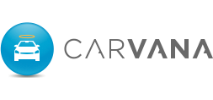

Di seguito si presentano le principali variabili che compongono il dataset DontGetKicked.

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def perc(x):
    return 100*x.value_counts/len(train)

In [10]:
train = pd.read_csv(data path)

Vediamo quali colonne appartengono al dataset

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

#### RefId 

Variabile che indica l'id di ogni veicolo. Questa variabile può essere rimossa in fase di analisi. 

#### IsBadBuy

Variabile che identifica se l'acquisto dell'auto doveva essere evitato, ovvero se la futura rivendita dell'auto ha prodotto una perdita. Rappresenta la variabile di interesse.

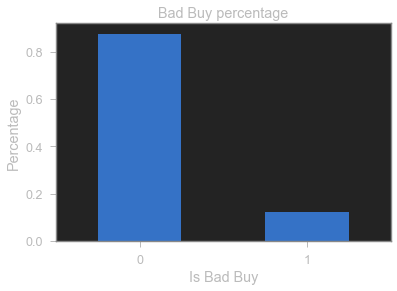

In [12]:
bb = train['IsBadBuy'].value_counts(normalize=True).plot(kind='bar', title='Bad Buy percentage')
plt.xlabel('Is Bad Buy')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.savefig('hist.png')

In [13]:
train["IsBadBuy"].value_counts(normalize=True)*100

0    87.701245
1    12.298755
Name: IsBadBuy, dtype: float64

Come si può notare dall'istogramma, nel training set i Bad buy corrispondono al 12% delcampione.

#### PurchDate

Identifica la data di acquisto del veicolo. Anche questa variabile non ci sembra rilevante ai fini dell'analisi.

#### Auction

Identifica la casa d'asta dalla quale è stato acquistato il veicolo

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

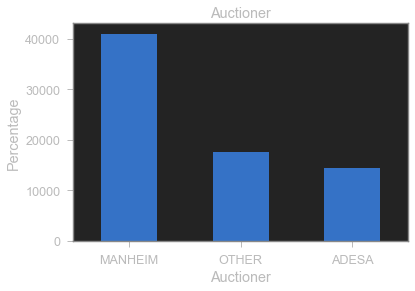

In [14]:
count_auction = train["Auction"].value_counts().plot(kind="bar", title="Auctioner")
plt.xlabel('Auctioner')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

Come si nota dall'istogramma, le case d'asta più presenti sono Manheim e Adesa, mentre le altre sono raggruppate in un'unica classe "other".

#### VehYear                            

È l'anno di produzione del veicolo.

Text(0, 0.5, 'Frequency')

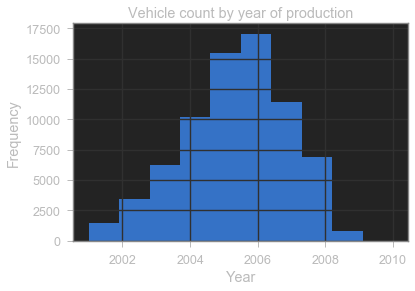

In [15]:
vehyear = train['VehYear'].hist()
plt.title('Vehicle count by year of production')
plt.xlabel('Year')
plt.ylabel('Frequency')

La maggior parte parte dei veicoli sono stati prodotti tra il 2005 ed il 2006. La distibuzione presenta una leggera asimmetria della coda sinistra ed una curtosi che indica una tendenza alla normalità.

In [16]:
train['VehYear'].describe()

count    72983.000000
mean      2005.343052
std          1.731252
min       2001.000000
25%       2004.000000
50%       2005.000000
75%       2007.000000
max       2010.000000
Name: VehYear, dtype: float64

In [17]:
train['VehYear'].skew()

-0.3373612280111606

In [18]:
train['VehYear'].kurt()

-0.3258624512438151

#### VehicleAge                        

La variabile mostra l'età del veicolo. La variabile mostra una corrispondenza esatta con VehYear, per cui bisognerà scegliere tra una delle due variabili. 

In [19]:
train['VehicleAge'].corr(train['VehYear'])

-0.9579570737978016

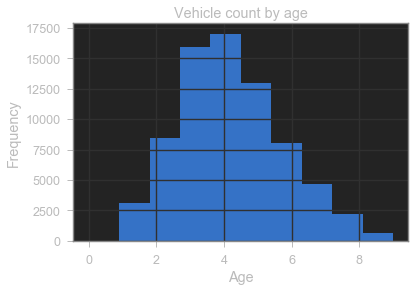

In [20]:
vehyear = train['VehicleAge'].hist()
plt.title('Vehicle count by age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('')

L'età media dei veicoli è di 4 anni. La distibuzione presenta una leggera asimmetria della coda destra ed una curtosi che indica una tendenza alla normalità, come ci si poteva aspettare data la corripondenza con la varibile dell'anno di produzione.

In [21]:
train['VehicleAge'].describe()

count    72983.000000
mean         4.176644
std          1.712210
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: VehicleAge, dtype: float64

In [22]:
train['VehicleAge'].skew()

0.3936160140515686

In [23]:
train['VehicleAge'].kurt()

-0.2092717781852378

#### Make                               

La variabile restituisce il produttore del veicolo.

In [24]:
maker = train['Make'].value_counts(normalize=True)

In [25]:
len(maker)

33

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 <a list of 6 Text xticklabel objects>)

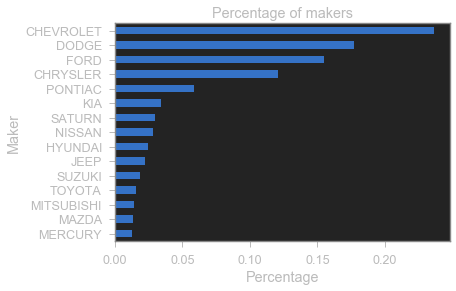

In [26]:
maker[maker>0.01].sort_values(ascending=True).plot(kind='barh', title='Percentage of makers')
plt.xlabel('Percentage')
plt.ylabel('Maker')
plt.xticks(rotation=0)

Nel grafico si mostrano i 15 marchi più frequenti nel dataset, con una frequenza maggiore dell'1%, sul totale di 33 marchi.

In [27]:
len(maker[maker>0.01])

15

#### Model                 

La variabile rappresenta i modelli di automobili del dataset.

In [28]:
model = train['Model'].value_counts(normalize=True)

In [29]:
len(model)

1063

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035]),
 <a list of 8 Text xticklabel objects>)

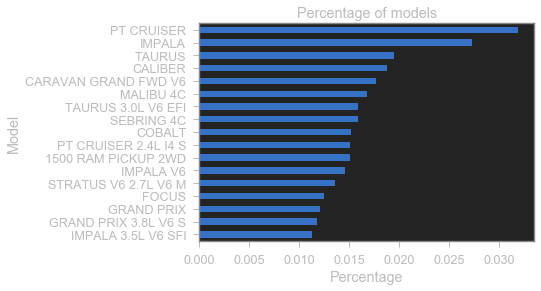

In [30]:
model[model>0.01].sort_values(ascending=True).plot(kind='barh', title='Percentage of models')
plt.xlabel('Percentage')
plt.ylabel('Model')
plt.xticks(rotation=0)

Nel grafico si mostrano i primi 17 modelli di automobili, che hanno una frequenza maggiore dell'1%.
Nel dataset sono quindi presenti tantissimi modelli rappresentati da poche unità statistiche.

In [31]:
len(model[model>0.01])

17

#### Trim                               

La variabile è valorizzata dai codici di allestimento del veicolo. Sono inoltre presenti 2360 valori NaN (il 3.2% del totale) che dovrannoessere gestiti in seguito.

In [32]:
train['Trim'].isnull().sum()

2360

In [33]:
train['Trim'].isnull().sum()/len(train)*100

3.2336297493936947

In [34]:
trim = train['Trim'].value_counts(normalize=True)

In [35]:
len(trim)

134

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 <a list of 6 Text xticklabel objects>)

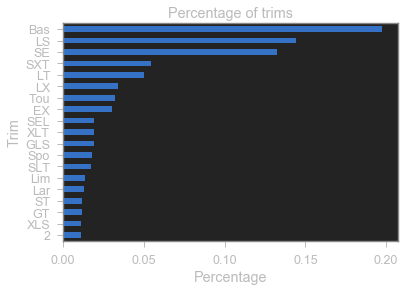

In [36]:
trim[trim>0.01].sort_values(ascending=True).plot(kind='barh', title='Percentage of trims')
plt.xlabel('Percentage')
plt.ylabel('Trim')
plt.xticks(rotation=0)

La maggior dei modelli presentano un allestimento "base"(~20%). Nel grafico sono riportati i codici con un frequenza maggiore dell'1%.

In [37]:
trim

Bas    0.197528
LS     0.144061
SE     0.132365
SXT    0.054161
LT     0.050125
         ...   
Ult    0.000014
Har    0.000014
Xsp    0.000014
L 3    0.000014
JLX    0.000014
Name: Trim, Length: 134, dtype: float64

#### SubModel                         

La variabile rappresenta i sotto-modelli dei veicoli. Sono presenti 8 valori NaN che saranno gestiti in seguito.

In [38]:
train['SubModel'].isnull().sum()

8

In [39]:
subm = train['SubModel'].value_counts(normalize=True)

In [40]:
len(subm)

863

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 <a list of 6 Text xticklabel objects>)

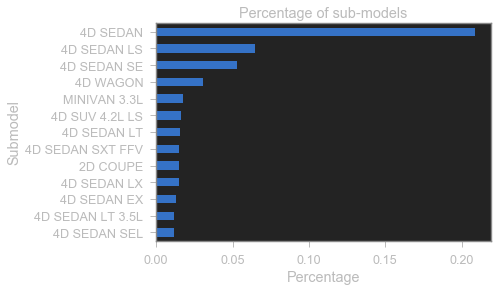

In [41]:
subm[subm>0.01].sort_values(ascending=True).plot(kind='barh', title='Percentage of sub-models')
plt.xlabel('Percentage')
plt.ylabel('Submodel')
plt.xticks(rotation=0)

Nel grafico sono riportati i sotto-modelli con frequenza maggiore,superiore all'1%.

#### Color                              

La variabile rappresenta il colore del veicolo. Anche qui sono presenti 8 valori NaN. Non consideriamo questa variabile una potenziale candidata per predire un possibile Bad Buy, ma potrebbe tornare utile per individuare qualche  valore missing.

In [42]:
train['Color'].isnull().sum()

8

In [43]:
len(train['Color'].unique())

17

In [44]:
color = train['Color'].value_counts(normalize=True)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 <a list of 6 Text xticklabel objects>)

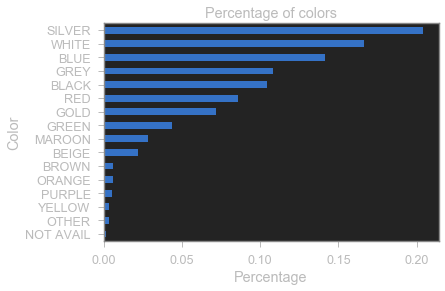

In [45]:
color.sort_values(ascending=True).plot(kind='barh', title='Percentage of colors')
plt.xlabel('Percentage')
plt.ylabel('Color')
plt.xticks(rotation=0)

Nel grafico sono riportati i colori ordinati per frequenza.

#### Transmission                       

Questa variabile indica il tipo di cambio posseduto dall'automobile (manuale o automiatico). sono presenti 8 valori null che saranno gestiti in seguito.

In [47]:
train['Transmission'].isnull().sum()

9

In [48]:
transm = train['Transmission'].value_counts(normalize=True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

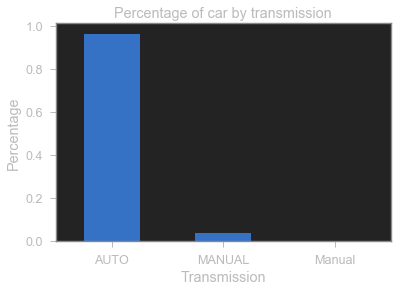

In [49]:
transm = train['Transmission'].value_counts(normalize=True).plot(kind='bar', title='Percentage of car by transmission')
plt.xlabel('Transmission')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

Nel grafico si mostrano le frequenze relative alla variabile. La maggior parte dei veicoli presentano cambio automatico (70%).
Nella variabile è presente un'osservazione "Manual" che sarà corretta in fase di data cleaning.

In [50]:
train['Transmission'].value_counts()

AUTO      70398
MANUAL     2575
Manual        1
Name: Transmission, dtype: int64

#### WheelType                          

Rappresenta il tipo di cerchi dell'automobile. La variabile presenta una corrispondenza esatta con la variabile WheelTypeID, per cui si presenta solo questa. Sono presenti 3174 valori null(4.3%) che saranno gestiti in seguito.

In [51]:
train['WheelType'].isnull().sum()

3174

In [52]:
train['WheelType'].isnull().sum()/len(train)*100

4.348957976515079

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

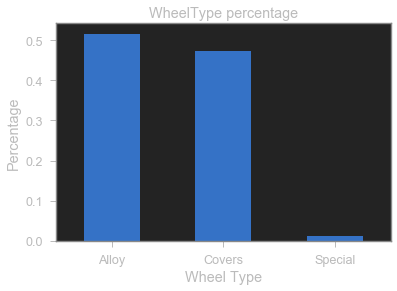

In [53]:
wheel = train['WheelType'].value_counts(normalize=True).plot(kind='bar', title='WheelType percentage')
plt.xlabel('Wheel Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

#### VehOdo                             

Rappresenta il conteggio dell'odometro dell'automobile, che misura quanti chilometri ha percorso l'auto nella sua vita. In kaggle è segnalato che questo valore è spesso falsato nelle auto vendute all'asta, per cui questa variabile dovrà essere utilizzata con cautela.

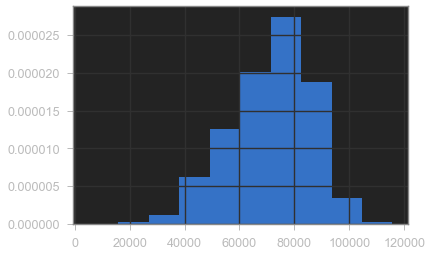

In [54]:
train['VehOdo'].hist(density=True)

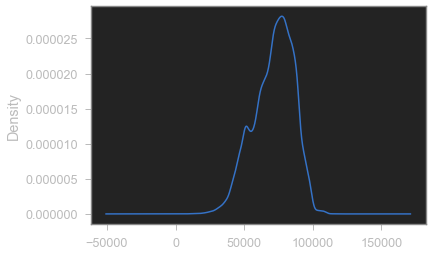

In [55]:
train['VehOdo'].plot(kind="kde")

Si riporta l'istogtramma della variabile. La distribuzione è riconducibile ad una normale (indice di curtosi vicino a zero) ed è leggermente asimmetrica a sinistra.

In [56]:
train['VehOdo'].describe()

count     72983.000000
mean      71499.995917
std       14578.913128
min        4825.000000
25%       61837.000000
50%       73361.000000
75%       82436.000000
max      115717.000000
Name: VehOdo, dtype: float64

In [57]:
train['VehOdo'].skew()

-0.45314542975653155

In [58]:
train['VehOdo'].kurt()

-0.1987398751546534

#### Nationality                        

La nazionalità del veicolo. Sono presenti 5 valori null.

In [59]:
train['Nationality'].isnull().sum()

5

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

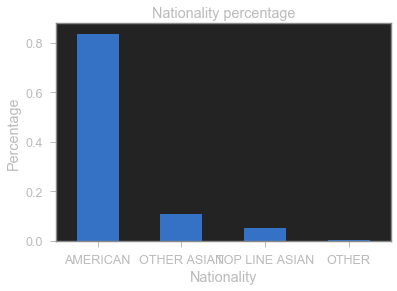

In [60]:
nation = train['Nationality'].value_counts(normalize=True).plot(kind='bar', title='Nationality percentage')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

Come si vede dal grafico a barre, la maggior parte dei veicoli sono americani (83.6%).

In [61]:
train['Nationality'].value_counts(normalize=True)

AMERICAN          0.836252
OTHER ASIAN       0.110074
TOP LINE ASIAN    0.051002
OTHER             0.002672
Name: Nationality, dtype: float64

#### Size              

Variabile che definisce la grandezza del veicolo. sono presenti 5 valori null.

In [62]:
train['Size'].isnull().sum()

5

In [63]:
size = train['Size'].value_counts(normalize=True)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]), <a list of 6 Text xticklabel objects>)

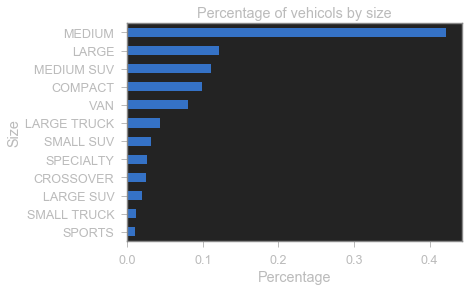

In [64]:
size.sort_values(ascending=True).plot(kind='barh', title='Percentage of vehicols by size')
plt.xlabel('Percentage')
plt.ylabel('Size')
plt.xticks(rotation=0)

Dal grafico si vede che la maggior parte dei vecoli ha taglia media (il 42%)

In [65]:
size

MEDIUM         0.421839
LARGE          0.121269
MEDIUM SUV     0.110855
COMPACT        0.098728
VAN            0.080216
LARGE TRUCK    0.043438
SMALL SUV      0.031187
SPECIALTY      0.026241
CROSSOVER      0.024103
LARGE SUV      0.019636
SMALL TRUCK    0.011839
SPORTS         0.010647
Name: Size, dtype: float64

#### MMRAcquisition cost variables

Le variabili di tipo MMR rappresentano la valutazione del prezzo del veicolo secondo la rivista specializzata MMR. In particolare:

MMRAcquisitionAuctionAveragePrice: prezzo del veicolo all'asta in condizioni medie al momento dell'acquisto;

MMRAcquisitionAuctionCleanPrice: prezzo del veicolo all'asta in condizioni sopra la media al momento dell'acquisto;

MMRAcquisitionRetailAveragePrice: prezzo del veicolo al concessionario in condizioni medie al momento dell'acquisto;

MMRAcquisitonRetailCleanPrice: prezzo del veicolo al concessionario in condizioni sopra la media al momento dell'acquisto;

MMRCurrentAuctionAveragePrice: prezzo del veicolo all'asta in condizioni medie al momento della costruzione del dataset;

MMRCurrentAuctionCleanPrice: prezzo del veicolo all'asta in condizioni sopra la media al momento della costruzione del dataset;

MMRCurrentRetailAveragePrice: prezzo del veicolo al concessionario in condizioni medie al momento della costruzione del dataset;

MMRCurrentRetailCleanPrice: prezzo del veicolo al concessionario in condizioni sopra la media al momento della costruzione del dataset.

La nostra opinione è che le variabili Current non debbano essere utilizzate in un'ottica di previsione di un possibile Bad buy, in quanto non è possibile conoscere a priori quanto varrà il veicolo in un periodo futuro, se non facendo ulteriori previsioni. Per questo le varibili Current saranno escluse dall'analisi. Sono presenti 18 valori null per le variabili Acquisistion e 315 valori null per le variabili Current.
Per sintesi si espone la distribuzione della sola MMRAcquisitionAuctionAveragePrice, dato che le variabili presentano tutte distribuzione simile.

In [66]:
train['MMRAcquisitionAuctionAveragePrice'].isnull().sum()

18

In [67]:
train['MMRCurrentAuctionCleanPrice'].isnull().sum()

315

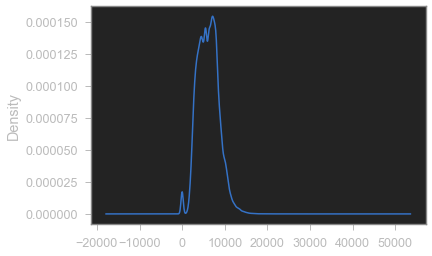

In [68]:
train['MMRAcquisitionAuctionAveragePrice'].plot(kind="kde")

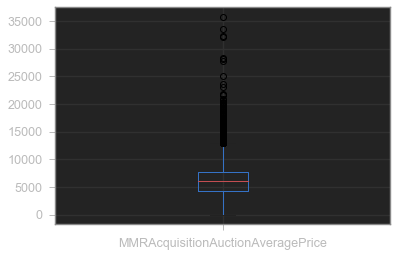

In [69]:
train[['MMRAcquisitionAuctionAveragePrice']].boxplot()

In [70]:
mmr_cutted=train['MMRAcquisitionAuctionAveragePrice'][train['MMRAcquisitionAuctionAveragePrice']<13000]

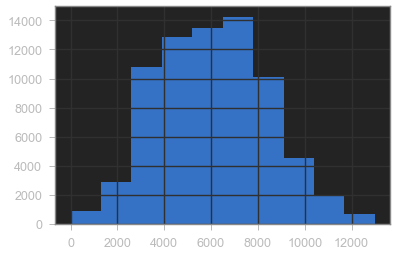

In [71]:
mmr_cutted.hist()

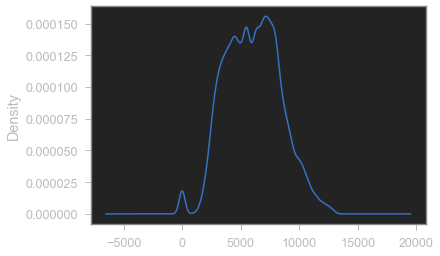

In [72]:
mmr_cutted.plot(kind="kde")

In [73]:
train['MMRAcquisitionAuctionAveragePrice'].describe()

count    72965.000000
mean      6128.909217
std       2461.992768
min          0.000000
25%       4273.000000
50%       6097.000000
75%       7765.000000
max      35722.000000
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

In [74]:
train['MMRAcquisitionAuctionAveragePrice'].skew()

0.46364056265780007

In [75]:
train['MMRAcquisitionAuctionAveragePrice'].kurt()

1.5937275473735384

In [76]:
mmr_cutted.skew()

0.12593862584479562

In [77]:
mmr_cutted.kurt()

-0.29823515872163586

#### PRIMEUNIT &  AUCGUART        

Variabili che rappresentano se il veicolo è ambito(Primeunit) e se coperto da garanzia(Aucguart).
L'elevatissimo numero di missing in queste due variabili (95.3%) rende molto difficile il loro utilizzo, per cui saranno scartate.

In [78]:
train['PRIMEUNIT'].isnull().sum()/len(train)*100

95.31534740967075

In [79]:
train['AUCGUART'].isnull().sum()/len(train)*100

95.31534740967075